# Assignment 12

### 1.复习上课内容

### 2.回答以下理论问题

#### 1. 请写一下TF-IDF的计算公式

$$ tf_{t,d} = \log_{10}(count(t,d) + 1) $$
$$ idf_{t} = \log_{10}(\frac{N}{df_t}) $$
$$ w_{t,d} = tf_{t,d} \times idf_{t} $$

#### 2. LDA算法的基本假设是什么？

（1）每个文档的主题满足一定的分布（2）每个主题的单词满足一定的分布。

#### 3. 在TextRank算法中构建图的权重是如何得到的？

根据词向量计算cos距离，可以作为权重。

#### 4. 什么是命名实体识别？ 有什么应用场景？

找到一段话里面的特定实体，如人名，地名，公司等。可以应用在知识图谱里。

#### 5.NLP主要有哪几类任务 ？

序列标注：分词/语义标注  
分类任务：文本分类/情感计算  
句子关系判断：自然语言推理  
生成式任务：机器翻译/文本摘要

### 3.实践题

#### 3.1 手动实现TextRank算法 (在新闻数据中随机提取100条新闻训练词向量和做做法测试）

 提示：
 1. 确定窗口，建立图链接。   
 2. 通过词向量相似度确定图上边的权重
 3. 根据公式实现算法迭代(d=0.85)

In [62]:
text = '北京 时间 6 月 20 日 克利夫兰 骑士队 选择 不 与 总经理 大卫 格里芬 续约 格里芬 将 卸任 骑士 总经理 并 在 随后 发表 了 离职 声明 格里芬 首先 感谢 了 骑士 老板 的 知遇之恩 今天 我 将 卸任 骑士 总经理 我们 的 篮球 团队 一起 在 训练场 和 速贷 中心 无论 场内 和 场外 都 取得 了 史无前例 的 成功 我 至今 仍 十分 感激 丹 吉尔伯特 和 其他 股东 给 我 的 机会 能 让 我们 组件 和 领导 了 这支 冠军 球队 随后 他 又 祝愿 骑士 能 在 未来 取得 更好 成绩 并 感谢 了 克城 球迷 我 确信 管理层 和 这支 无私 热情 的 球队 都 全身心 地 投入 到 日常 工作 之中 他们 会 继续 为了 更 高 的 成就 奋斗 我 的 妻子 和 我会 把 自己 作为 克利夫兰 成功 的 一部分 对于 这座 伟大 城市 的 球迷 给予 我们 的 友好 我们 感激不尽 我 对 在 NBA 的 下 一个 挑战 十分 期待 对于 卸任 的 原因 格里芬 表示 我 和 吉尔伯特 都 知道 建设 球队 需要 一样 的 理念 但 现在 我们 的 理念 发生 了 分歧 云彦'

In [63]:
text

'北京 时间 6 月 20 日 克利夫兰 骑士队 选择 不 与 总经理 大卫 格里芬 续约 格里芬 将 卸任 骑士 总经理 并 在 随后 发表 了 离职 声明 格里芬 首先 感谢 了 骑士 老板 的 知遇之恩 今天 我 将 卸任 骑士 总经理 我们 的 篮球 团队 一起 在 训练场 和 速贷 中心 无论 场内 和 场外 都 取得 了 史无前例 的 成功 我 至今 仍 十分 感激 丹 吉尔伯特 和 其他 股东 给 我 的 机会 能 让 我们 组件 和 领导 了 这支 冠军 球队 随后 他 又 祝愿 骑士 能 在 未来 取得 更好 成绩 并 感谢 了 克城 球迷 我 确信 管理层 和 这支 无私 热情 的 球队 都 全身心 地 投入 到 日常 工作 之中 他们 会 继续 为了 更 高 的 成就 奋斗 我 的 妻子 和 我会 把 自己 作为 克利夫兰 成功 的 一部分 对于 这座 伟大 城市 的 球迷 给予 我们 的 友好 我们 感激不尽 我 对 在 NBA 的 下 一个 挑战 十分 期待 对于 卸任 的 原因 格里芬 表示 我 和 吉尔伯特 都 知道 建设 球队 需要 一样 的 理念 但 现在 我们 的 理念 发生 了 分歧 云彦'

In [64]:
# 获取停用词表
stop_words = []
with open('./百度停用词表.txt',encoding='utf-8') as f:
    for word in f.readlines():
        stop_words.append(word.strip())

In [65]:
# 去除文本中的停用词
text = [t for t in text.split() if t not in stop_words]

In [66]:
connections = dict()

# 设定时间窗口
window = 3

for i in range(len(text) - window + 1):
    
    # 获取每个窗口中的连接词
    for node in text[i: i+window]:
        connections.setdefault(node, set())
        remain = text[i: i+window]
        remain.remove(node)
        for n in remain:
            connections[node].add(n)
            
print(connections)

{'北京': {'6', '时间'}, '时间': {'6', '北京', '月'}, '6': {'月', '20', '北京', '时间'}, '月': {'6', '日', '20', '时间'}, '20': {'6', '克利夫兰', '日', '月'}, '日': {'骑士队', '克利夫兰', '20', '月'}, '克利夫兰': {'20', '我会', '成功', '骑士队', '日', '妻子', '选择', '一部分'}, '骑士队': {'总经理', '克利夫兰', '日', '选择'}, '选择': {'骑士队', '克利夫兰', '大卫', '总经理'}, '总经理': {'发表', '篮球', '骑士', '大卫', '卸任', '骑士队', '格里芬', '团队', '随后', '选择'}, '大卫': {'续约', '格里芬', '总经理', '选择'}, '格里芬': {'续约', '总经理', '吉尔伯特', '声明', '骑士', '原因', '大卫', '卸任', '离职', '感谢', '格里芬', '建设'}, '续约': {'格里芬', '大卫', '卸任'}, '卸任': {'续约', '挑战', '老板', '知遇之恩', '骑士', '格里芬', '原因', '总经理', '期待'}, '骑士': {'篮球', '老板', '知遇之恩', '更好', '未来', '格里芬', '卸任', '祝愿', '感谢', '总经理', '随后'}, '随后': {'发表', '球队', '骑士', '祝愿', '离职', '总经理', '冠军'}, '发表': {'离职', '总经理', '声明', '随后'}, '离职': {'发表', '格里芬', '声明', '随后'}, '声明': {'发表', '感谢', '格里芬', '离职'}, '感谢': {'老板', '克城', '声明', '更好', '球迷', '骑士', '成绩', '格里芬'}, '老板': {'骑士', '感谢', '卸任', '知遇之恩'}, '知遇之恩': {'骑士', '老板', '卸任'}, '篮球': {'骑士', '总经理', '团队', '训练场'}, '团队': {'篮球', '总经理', '速贷', '训练场'}, '训练场'

In [136]:
# 计算一个 node 的 ws
def cal_ws(ws_dict, node, connections, d=0.85):
    
    # 获取所有相连的 node
    connected_nodes = connections[node]
    ws_n = 0
    for n in connected_nodes:
        
        # 获取每个相连的 node 有多少条连接
        # 通过计算每个相连的 node 的词向量，并计算 cos 作为 weights
        # 这里没有计算词向量
        out_line = len(connections[n])
        ws_n += (ws_dict[n] / out_line)
        
    ws = (1 - d) + d * ws_n
    
    return ws


# 计算所有 node 的 ws
def cal_all_ws(ws_dict, connections):
    
    # 建立新的字典存储重新计算的 ws
    new_ws_dict = dict()
    
    for node in ws_dict.keys():
        
        # 重新计算 ws 值
        ws = cal_ws(ws_dict, node, connections)
        new_ws_dict.setdefault(node, ws)
    
    return new_ws_dict


def main():
    result = []

    # 每个词的 WS 初始化为 0
    ws_dict = dict()
    for c in connections.keys():
        ws_dict.setdefault(c, 0)
    
    # 迭代更新 ws
    for i in range(50):
        ws_dict = cal_all_ws(ws_dict, connections)
        result.append(ws_dict)
    
    return result

In [137]:
result = main()

In [141]:
# 最后一次迭代排名前五的词
res = [(k, v) for k, v in result[-1].items()]
res.sort(key=lambda x: x[1], reverse=True)
res[:5]

[('格里芬', 2.1337566109979558),
 ('球队', 2.097484637833217),
 ('骑士', 1.9771339232314138),
 ('总经理', 1.8412060846674927),
 ('卸任', 1.6813943376941336)]

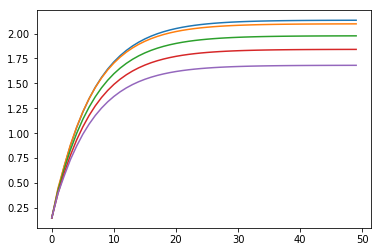

In [149]:
import matplotlib.pyplot as plt

# 画出排名前五的词的 ws 值的变化曲线
for k, _ in res[:5]:
    plt.plot([r[k] for r in result])

#### 选做 1.  提取新闻人物里的对话。(使用以上提取小数据即可）

提示：    
1.寻找预料里具有表示说的意思。    
2.使用语法分析提取句子结构。    
3.检测谓语是否有表示说的意思。

In [150]:
# todo 等有时间再做